In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

In [2]:
#loading data
df = pd.read_csv("Titanic-Dataset.csv")


# Data Exploring

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  

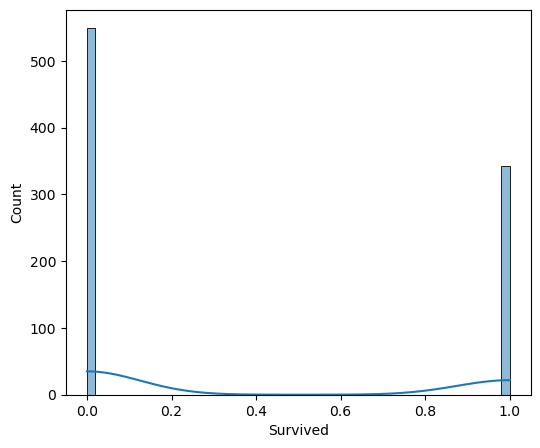

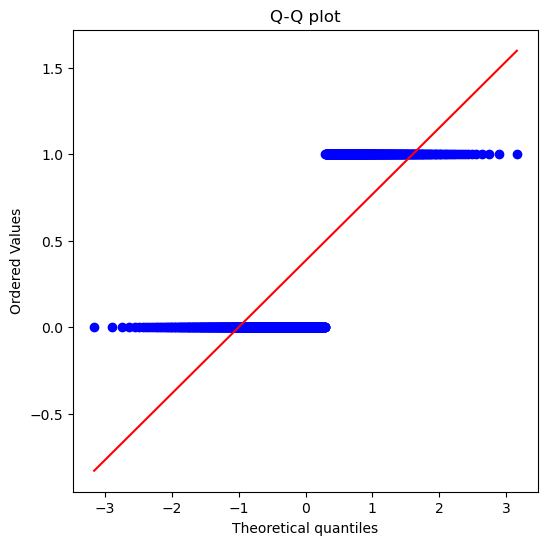

Skewness = 0.4777174662568536
__________________________________
_________Pclass_________


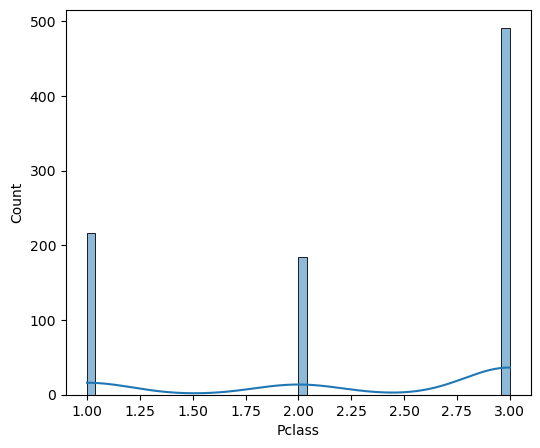

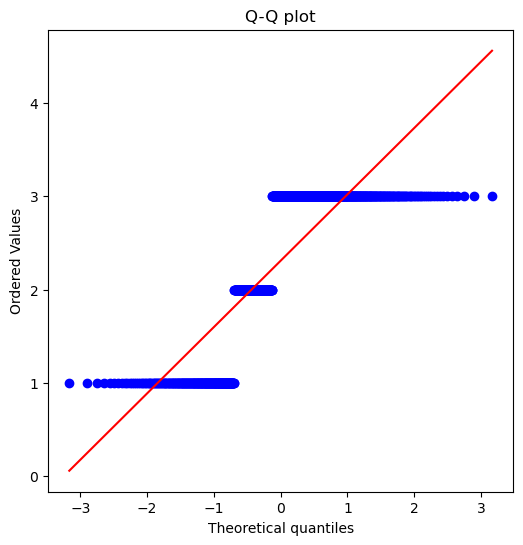

Skewness = -0.6294858816096934
__________________________________
_________Age_________


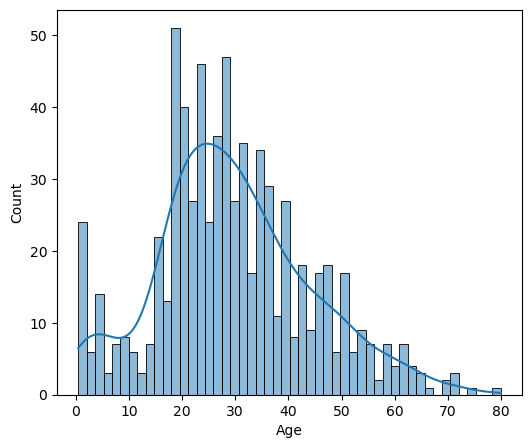

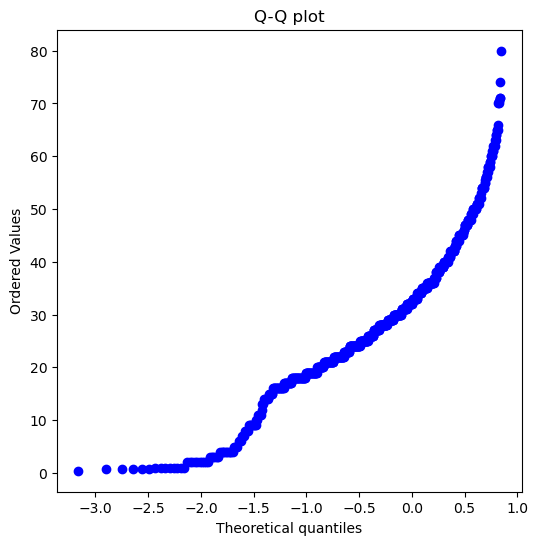

Skewness = 0.3882898514698657
__________________________________
_________SibSp_________


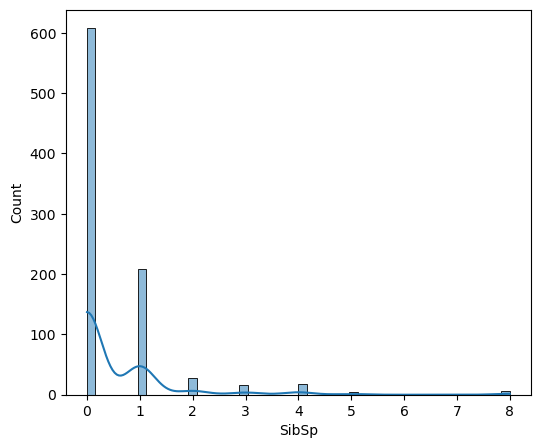

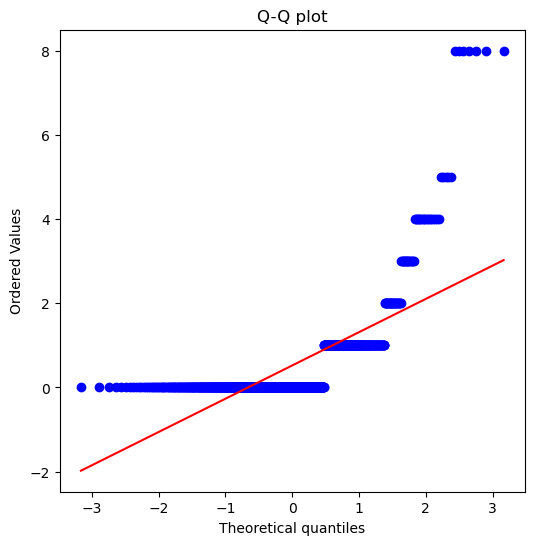

Skewness = 3.6891276847759507
__________________________________
_________Parch_________


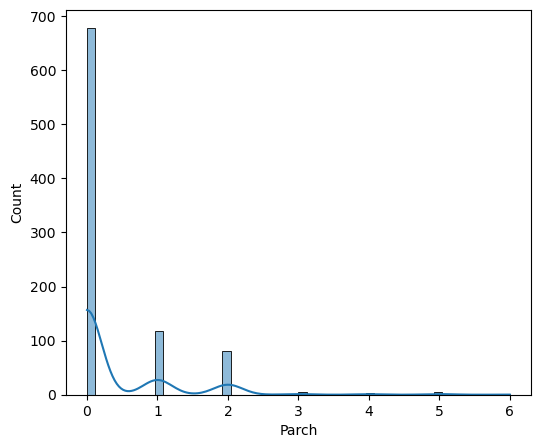

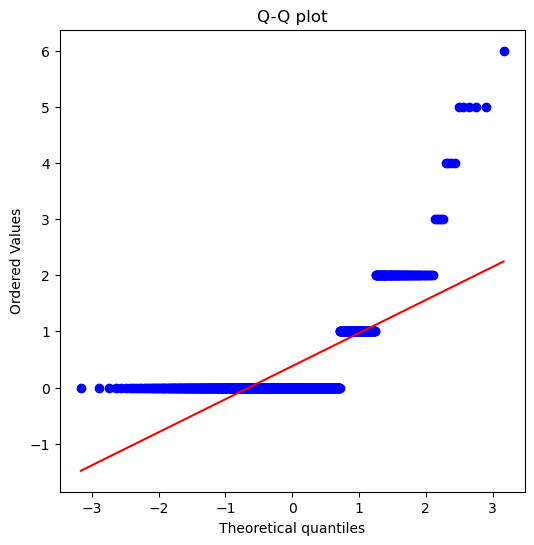

Skewness = 2.7444867379203735
__________________________________
_________Fare_________


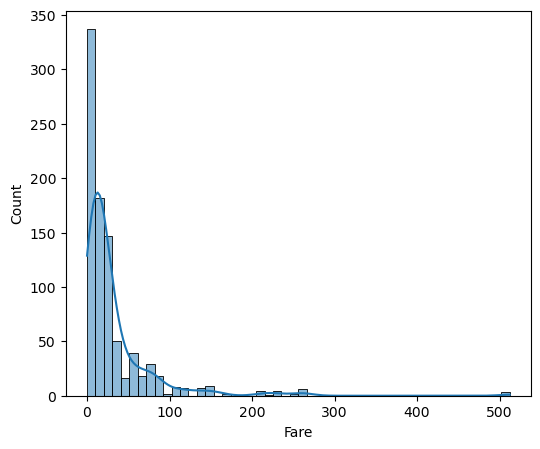

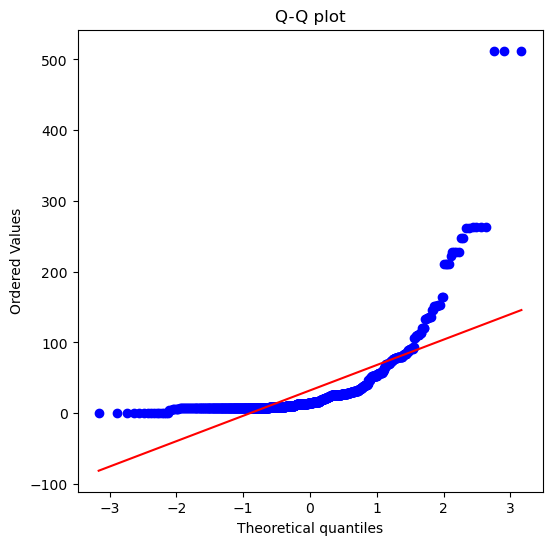

Skewness = 4.7792532923723545
__________________________________


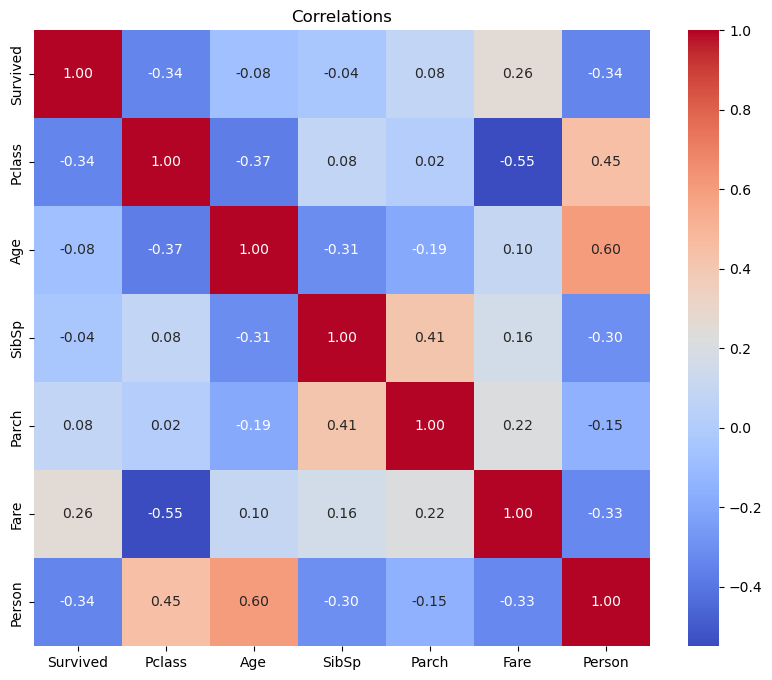

OUTLIERS
Survived: 0 outliers
Pclass: 0 outliers
Age: 11 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers
Person: 12 outliers
[1, 7, 8, 520, 10, 523, 13, 527, 16, 529, 530, 532, 533, 535, 24, 25, 537, 27, 539, 541, 542, 540, 31, 33, 34, 544, 548, 549, 550, 43, 557, 558, 50, 52, 54, 567, 58, 59, 61, 62, 63, 65, 68, 580, 581, 71, 72, 585, 587, 78, 591, 593, 595, 85, 86, 597, 88, 600, 93, 94, 96, 97, 98, 608, 610, 609, 102, 615, 616, 618, 622, 627, 116, 630, 119, 118, 120, 634, 631, 124, 637, 638, 128, 641, 642, 644, 645, 136, 651, 140, 139, 655, 145, 657, 147, 148, 659, 660, 151, 152, 153, 665, 155, 670, 159, 672, 160, 337, 164, 165, 166, 167, 678, 679, 681, 171, 683, 172, 686, 175, 176, 684, 685, 689, 180, 691, 182, 183, 184, 849, 698, 188, 700, 702, 193, 195, 708, 197, 709, 201, 716, 205, 720, 726, 215, 218, 730, 222, 736, 224, 737, 229, 742, 230, 741, 745, 233, 746, 237, 750, 751, 754, 755, 245, 247, 248, 759, 251, 763, 765, 254, 255, 256, 257, 258, 259, 261, 262, 77

In [3]:
##including num_cols except id -for later
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('PassengerId' , errors= 'ignore')
print (num_cols)

##data_details
print (df.head(10))
print (df.info())
print (df.describe())


##plotting, ignoring ID
for col in num_cols:
    ##Histogrm
    print (f"_________{df[col].name}_________")
    plt.figure(figsize=(6,5))
    sns.histplot(df[col], kde=True, bins = 50) 
    ###Checking skewness
    plt.figure(figsize=(6,6))
    stats.probplot(df[col],dist='norm' , plot=plt)
    plt.title("Q-Q plot")
    plt.show()
    print(f"Skewness = {skew(df[col].dropna())}")      #parch,sib,fare are highly positivly skewed
    print ("__________________________________")    


##Coleration between features to remove ineffective ones
df["Person"] = df["Age"] * df["Pclass"]
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('PassengerId', errors='ignore')
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix , annot=True , fmt=".2f" , cmap="coolwarm" , cbar= True , square= True)
plt.title("Correlations")                              #weak corelations 
plt.show()

##checking outliers 
def detect_outliers_iqr(df, cols):
    outlier_indices = set()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        print(f"{col}: {len(outliers_col)} outliers")
        outlier_indices.update(outliers_col)
    return list(outlier_indices)

print("OUTLIERS")
print(detect_outliers_iqr(df , num_cols))   #Parch and fare has so many outliers explaining their skewness



# Data CLeaning

In [4]:
#This step can be ignored if you just want analysis   
#dropping passengerId as its just a key added 
df_changed = df.drop("PassengerId", axis=1)
num_cols = df_changed.select_dtypes(include=["int64", "float64"]).columns

#dropping cols with more than 70% data missing
missing_percent = df_changed.isnull().mean() * 100
df_changed = df_changed.drop(columns=missing_percent[missing_percent > 70].index)

#Encoding text to numbers
df_changed["Sex"] = df_changed["Sex"].map({"male": 0, "female": 1}) #male into 0 women into 1

#handling nulls
n_null_rows = (df_changed.isnull().sum(axis=1) == 1) .sum()
print(f"Rows with at least one null: {n_null_rows}")    #531 rows have atleast one Null-> can't use dropna

n_null_rows = (df_changed.isnull().sum(axis=1) == 2) .sum()
print(f"Rows with at least one null: {n_null_rows}")    #19 rows have atleast two nulls -> we can drop those

threshold = 2
df_changed = df_changed[df_changed.isnull().sum(axis=1) < threshold] 

#replacing values that can be changed with their mean
for col in num_cols :
    if df_changed[col].isnull().sum() > 0 :
        df_changed[col].fillna(df_changed[col].mean(), inplace = True)


print("Remaining null values per column:")
print(df_changed.isnull().sum())                #only embarked has two missing valueg

#removing dublicates
df_changed = df_changed.drop_duplicates()


####TO use data in a model later data would need to be fixed from skewness using log probably in this case or boxcox
####also removing outliers

Rows with at least one null: 2
Rows with at least one null: 177
Remaining null values per column:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
Person      0
dtype: int64


## Age

Average Age : 30 Years
Oldest person : 80.0 Years
Youngest person : 0.42 Years


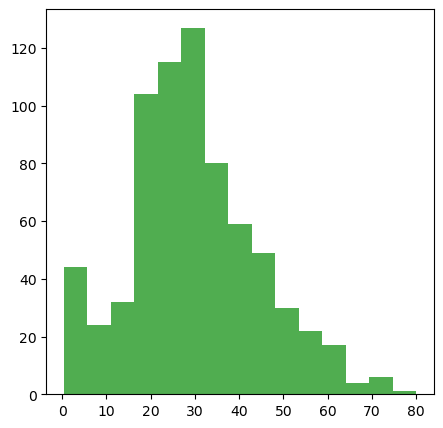

In [5]:
#Stastics
print (f"Average Age : {round(df['Age'].mean())} Years") #wrote age with double quotes and spent 20 mins (:
print (f"Oldest person : {df['Age'].max()} Years")
print (f"Youngest person : {df['Age'].min()} Years")


#Histogram
plt.figure(figsize=(5,5))
plt.hist(df["Age"].dropna(), bins=15 ,color = "#50AD50")
plt.show()


## Survivial analysis

Overall Survival Rate: 40.62%

Survival Rate by Gender:
Sex
0    20.529801
1    75.478927
Name: Survived, dtype: float64

Survival Rate by Pclass:
Pclass
1    65.591398
2    47.976879
3    23.943662
Name: Survived, dtype: float64

Survival Rate by Pclass:
Embarked
C    60.769231
Q    28.571429
S    36.281588
Name: Survived, dtype: float64


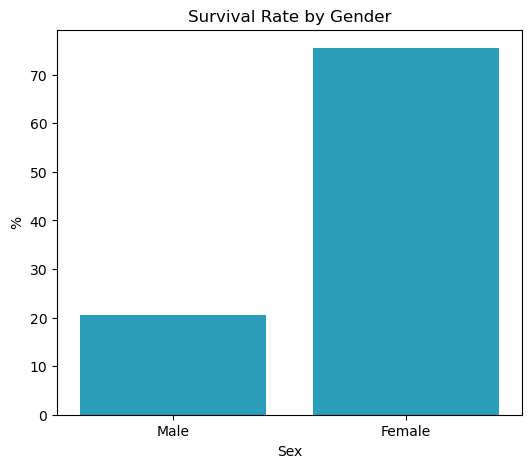

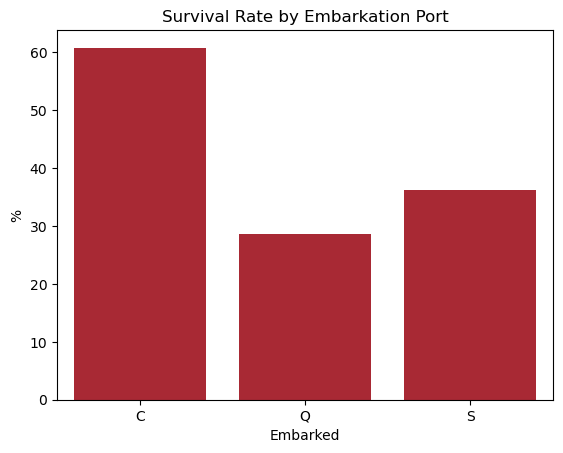

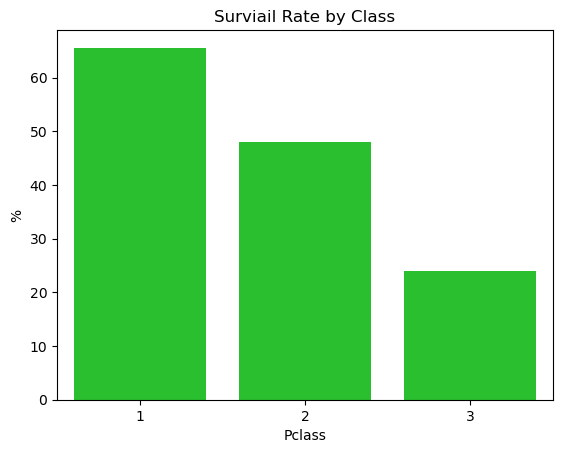

In [6]:
overall_survival = df_changed["Survived"].mean() * 100
print(f"Overall Survival Rate: {overall_survival:.2f}%")

#Gender
survival_by_gender = df_changed.groupby("Sex")["Survived"].mean() * 100
print("\nSurvival Rate by Gender:")
print(survival_by_gender)

#Passenger class
survival_by_class = df_changed.groupby("Pclass")["Survived"].mean() * 100
print("\nSurvival Rate by Pclass:")
print (survival_by_class)


#Passenger class
survival_by_embarked = df_changed.groupby("Embarked")["Survived"].mean() * 100
print("\nSurvival Rate by Pclass:")
print (survival_by_embarked)

#plotting
plt.figure(figsize=(6,5))
sns.barplot(x=survival_by_gender.index.map({0: "Male", 1: "Female"}), y=survival_by_gender.values , color= "#12ACD3")
plt.title("Survival Rate by Gender")
plt.ylabel("%")
plt.show()
#------Females survived more due to ships rule of women first--------#


sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, color= "#BD1422") 
plt.title("Survival Rate by Embarkation Port")
plt.ylabel("%")
plt.show()

sns.barplot(x = survival_by_class.index , y = survival_by_class.values , color="#10D816")
plt.title("Surviail Rate by Class")
plt.ylabel("%")
plt.show()  
#-----------Upper class were favoured ._.------------""

# Family Analysis

Survival Rate (Alone): 32.18%
Survival Rate (With Family): 67.82%


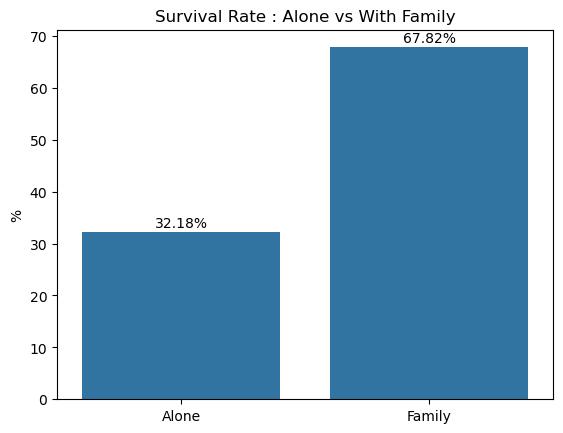

In [7]:
alone_survival = df_changed[df_changed["SibSp"] + df_changed["Parch"] == 0]["Survived"].mean() * 100
family_survival = 100.00 - alone_survival #we made sure above that the only null values are in embarked

print(f"Survival Rate (Alone): {alone_survival:.2f}%")
print(f"Survival Rate (With Family): {family_survival:.2f}%")

rates = [alone_survival , family_survival]
labels = ["Alone" , "Family"]

ax = sns.barplot(x = labels , y = rates)
plt.title("Survival Rate : Alone vs With Family")
plt.ylabel("%")

for i,valu in enumerate(rates) :
    ax.text(i , valu + 1 , f"{valu:.2f}%" , ha = "center" )

plt.show()


# Fare analysis

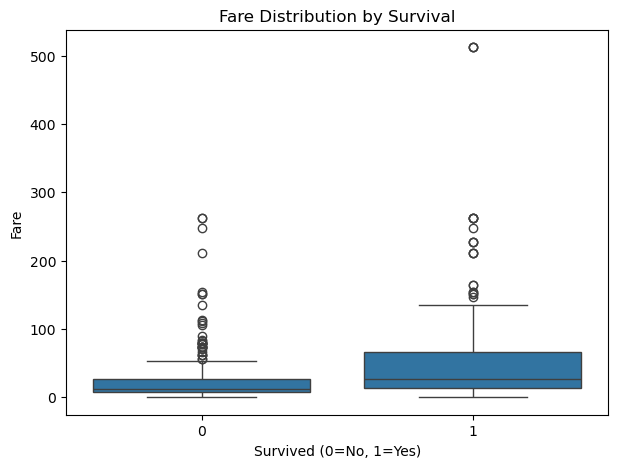

In [8]:
fare_rate = df_changed.groupby("Survived")["Fare"].mean()

plt.figure(figsize=(7,5))
sns.boxplot(x="Survived", y="Fare", data=df_changed)
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Fare")
plt.show()

#those who paid more were favoured -proven what the class plot suggested


# Age groups


AgeGroup
Children     57.971014
Teenagers    41.052632
Adults       38.931298
Seniors      26.923077
Name: Survived, dtype: float64


/tmp/ipykernel_4598/329640153.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df_changed.groupby("AgeGroup")["Survived"].mean() * 100
/tmp/ipykernel_4598/329640153.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


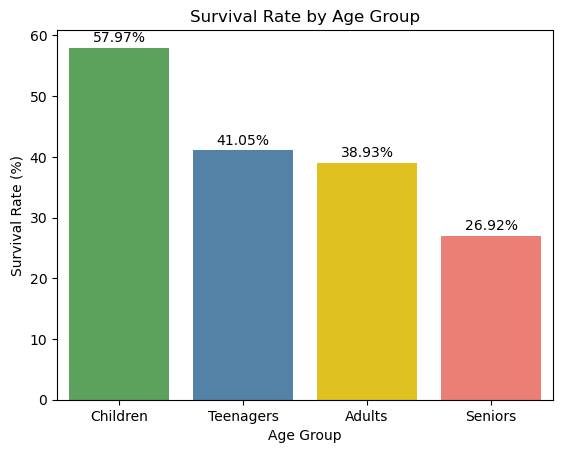

In [ ]:
bins = [0, 12, 19, 59, 100]  
labels = ["Children", "Teenagers", "Adults", "Seniors"]

df_changed["AgeGroup"] = pd.cut(df_changed["Age"], bins=bins, labels=labels, right=True)
survival_by_age_group = df_changed.groupby("AgeGroup")["Survived"].mean() * 100
print(survival_by_age_group)


#plotting
ax = sns.barplot(
    x=survival_by_age_group.index,      # Age groups
    y=survival_by_age_group.values,     # Survival rates
    palette=["#50AD50", "#4682B4", "#FFD700", "#FF6F61"]
)
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Age Group")

# Add value labels on bars
for i, val in enumerate(survival_by_age_group.values):
    ax.text(i, val + 1, f"{val:.2f}%", ha="center")

plt.show()
#Children were put on boats first , elders were saved from mechanics 3


